In [ ]:
from math import sqrt
import matplotlib.pyplot as plt
# from numpy import log as ln
# from numpy import linspace

import numpy as np

import random

import json

In [ ]:
# ------------------------------------- ETAPA 0 (armazenando em listas)
def armazenar_em_lista(data_list):
  # Armazena as alturas, peso, idades e nomes de todos os jogadores
  lista_alturas = [] #0
  lista_pesos = [] #1
  lista_idades = [] #2
  lista_nomes = [] #3

  for i in data_list:
    for key, value in i.items():
      if key == 'ALTURA':
        lista_alturas.append(value)
      elif key == 'PESO':
        lista_pesos.append(value)
      elif key == 'IDADE':
        lista_idades.append(value)
      elif key == 'NOME':
        lista_nomes.append(value)
  return lista_alturas, lista_pesos, lista_idades, lista_nomes

# Retorna o imc como resultado
def calc_imc(m, h):
    imc = m / h**2

    # até 4 casas decimais
    imc = round(imc, 4)

    return imc

# Recebe a lista sequencial de todos os imc's dos jogadores
# Retorna o imc como resultado
def calc_imc_medio(lista_imcs):
    y = sum(lista_imcs) / len(lista_imcs)
    return y

def calc_imc_max(lista_imcs):
    y_max = max(lista_imcs)
    return y_max

# Recebe a média do IMC de todos os jogadores
# Retorna a média do IMC subtraido ao valor máximo de imc 
# aceitavel dividido pelo proprio valor maximo
def delta_imc_medio(y, y_max):
    delta_y = abs(y_max - y) / y_max
    return delta_y

In [ ]:
# parâmetro: lista de alturas, lista de imcs
def calc_tmb(h, imc):
  idade = 25
  # equação proveniente do 'artigo 1' enviado pelo professor
  tmb = -0.1631 - 0.00255 * idade + 0.4721 * ln(h*imc) + 0.2952 * ln(h)
  tmb = round(tmb,4)
  return tmb

In [ ]:
posicao = "DEFENSOR"
f = open("/content/defensores.json")
data_list = json.load(f)

# Armazena em uma lista todos os atributos dos jogadores
# listas = [[alturas], [pesos], [idades], [nomes]]
listas = armazenar_em_lista(data_list)
lista_alturas = listas[0]
lista_pesos = listas[1]
lista_idades = listas[2]
lista_nomes = listas[3]

imcs = []
imcs_g = []

time = []
for i in range(len(data_list)):
    imc_atual = calc_imc(lista_pesos[i], lista_alturas[i])
    nomes_e_dados = [lista_nomes[i]] 
    nomes_e_dados.append(lista_alturas[i])
    nomes_e_dados.append(lista_pesos[i])
    nomes_e_dados.append(lista_idades[i])
    nomes_e_dados.append(imc_atual)

    imcs.append(imc_atual)
    time.append(nomes_e_dados)

print(time[0])
# Calculo do imc_medio (y)
y = calc_imc_medio(imcs)
print(f"O IMC médio dos {posicao} é de {y:.4f}.")

# Calculando o imc_max (y_max)
y_max = calc_imc_max(imcs)
print(f"O IMC máximo dos {posicao} é de {y_max:.4f}.")

# Variação de IMC's
delta_y = delta_imc_medio(y, y_max)
print(f"O valor da variação de IMCs dos {posicao} é de {delta_y}.")

# Selecionando jogadores com base na altura deles
sub_time = []
for dados in time:
    # Verifica se a altura está dentro do intervalo
    if dados[1] >= 1.65 and dados[1] <= 1.92:
        sub_time.append(dados) # adiciona linha para a nova matriz


print(f"Foram subselecionados {len(sub_time)}/{len(time)} DEFENSOR")

taxa_metabolica = []

for dados in sub_time:
    # como parâmetro: altura, massa e idade
    taxa = calc_tmb(dados[1], dados[4])
    dados.append(taxa) # adiciona a taxa à lista (o valor da taxa metabolica fica armazenado na posição 5)
print(sub_time[0])

['EDUARDO', 1.73, 73.0, 35.0, 24.3911]
O IMC médio dos DEFENSOR é de 22.7993.
O IMC máximo dos DEFENSOR é de 28.0497.
O valor da variação de IMCs dos DEFENSOR é de 0.18718152829747625.
Foram subselecionados 280/294 DEFENSOR
['EDUARDO', 1.73, 73.0, 35.0, 24.3911, 1.7017]


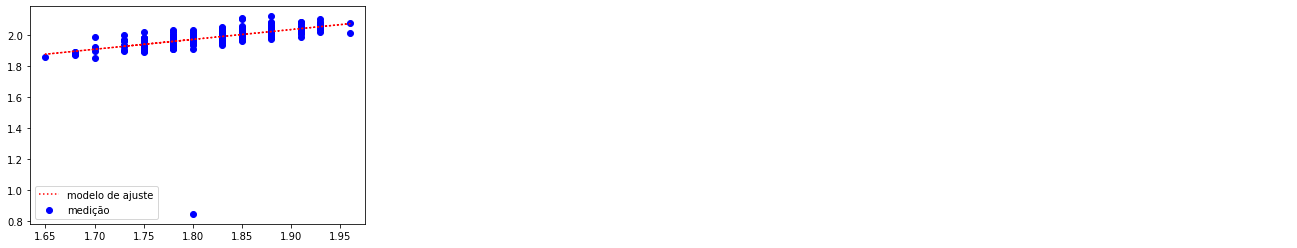

In [ ]:
# plotagem :)
x = np.array(lista_alturas)
y = np.array(-0.1631 - 0.00255 * np.array(lista_idades) + 0.4721 * np.log(lista_pesos) + 0.2952 * np.log(lista_alturas))
# plt.plot(lista_alturas, -0.1631 - 0.00255 * 25 + 0.4721 * ln(lista_pesos) + 0.2952 * ln(lista_alturas)) # linha
m = len(lista_alturas)

alpha1 = (m*np.dot(x,y) - np.sum(x)*np.sum(y))/(m*np.dot(x,x)-np.sum(x)**2)
alpha0 = np.mean(y) - alpha1*np.mean(x)

y2 = alpha0 + alpha1*x

mod = plt.plot(x,y2,'r:'); # modelo
med = plt.scatter(x,y,c='b'); # medição
plt.legend({'modelo de ajuste':mod, 'medição':med}); # legenda

# esta linha adiciona a equação de ajuste ao gráfico na posição (x,y) = (2.8,0.8)
# com fonte tamanho 14 e cor RGB = [0.4,0.5,0.4].
plt.annotate('y= {0:.2f} + {1:.2f}x'.format(alpha0,alpha1),(2.8,0.8),fontsize=14,c=[0.4,0.5,0.4]);

# plt.scatter(x,y)
